# 딥러닝 강의 - softmax classification과 cnn 

In [7]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
#mnist 자료 불러오기
import matplotlib.pyplot as plt

In [8]:
#tensorflow에서 기본적으로 제공하는 mnist데이터를 받아옵니다. 
#이 데이터는 사진(28*28*1)으로, 흰색 배경에 검은색으로 0~9까지 숫자가 필기체로 적혀있습니다. 
#이때 이 사진에 어떤 수가 적혀있는 것인지 맞추게 하는 것이 이번 딥러닝 예제의 목표입니다..!


mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# one hot encoding을 통해서 자료형태 변환 -> 모두 동일한 거리를 갖게 되므로 컴퓨터가 오해하지 않음

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# softmax classification-basic NN

### 텐서플로우 노드를 만들어봅시다.

In [9]:

#None은 몇개이든지 상관없다는 뜻, 보통 자료 갯수가 얼마나 될지 모르니까 None으로 넣으면 됨


x=tf.placeholder(tf.float32,[None,784],name='x')

y=tf.placeholder(tf.float32,[None,10],name='y')
    
#여기서 784라는 숫자는 사진이 28*28*1이기 때문에 한 사진당 총 픽셀이 28의 제곱인 784개 들어있기 떄문에 사용합니다. 
#만약 흑백이 아니라 컬러였다면 28*28*3도 가능

#즉 softmax classification 방법은 데이터를 일렬로 쭉 펴서 저장해두는 방식을 사용합니다.
#이때 placeholder는 나중에 데이터를 넣을 수 있는 '통' 같은 개념이라 이해하시면 편합니다. 

### 가설함수 H(x)=Wx+b를 만들어 봅시다. 

In [10]:
# with를 사용함으로써 시각적으로 편할 뿐만 아니라 각 layer의 구분이 가능 

with tf.name_scope("layer1"):
    #우리가 글로 적을 때는 Wx+b라 적지만 실제 코딩을 할떄는 xW+b와 같은 형태입니다.
    #x가 n*784, W가 784*28 b가 n*28이고 따라서 layer1은 n*28이 될 것입니다. 
    W1=tf.Variable(tf.random_normal([784,28]),name='weight1')
    b1=tf.Variable(tf.random_normal([28]),name='bias1')
    layer1=tf.sigmoid(tf.matmul(x,W1)+b1)
    #x랑 W1 순서 주의할 것, matmul = matrix multiply, sigmoid를 통해서 0~1 사이 숫자 반환
    
    
    #summary.histogram은 tensorboard에서 표를 그릴때 사용하는 것으로 
    #나중에 tensorboard를 배우고 싶으신 분들이 있을까봐 참고용으로 지우지 않고 넣어두었습니다. 
    #w1_hist=tf.summary.histogram("weighth1",W1)
    #b1_hist=tf.summary.histogram("biash1",b1)
    #layer1_hist=tf.summary.histogram("layer1",layer1)

with tf.name_scope("layer2"):
    W2=tf.Variable(tf.random_normal([28,10]),name='weight2')
    b2=tf.Variable(tf.random_normal([10]),name='bias2')
    #784->28->10
    #logits는 Wx+b로 우리가 W,b를 조절하며 계산,예측한 값을 의미합니다. 
    #layer1이 input값으로 입력된다느 사실
    #굳이 logit을 나눠놓은 이유는 뒤에서 사용하기 위해서! 
    #softmax : binary classification이 아니라 카테고리가 다양한 경우에 예측 가능, 모든 카테고리에 해당하는 값을 합치면 1이되도록 값지정
    logits=tf.matmul(layer1,W2)+b2
    hypo=tf.nn.softmax(logits)
   
    #w2_hist=tf.summary.histogram("weighth2",W2)
    #b2_hist=tf.summary.histogram("biash2",b2)
    #logits_hist=tf.summary.histogram("logits",logits)
    

### cost함수를 만들어 봅시다

In [11]:

with tf.name_scope("cost"):
    cost=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y)
    #다양한 카테고리 중 예측할 때 softmax와 함께 cost 값으로 softmax_cross_entropy를 주로 사용
    #logistic regression처럼 cost함수로 RMSE가 아닌 -log를 사용하여 추정
    #cost_sum=tf.summary.scalar("cost",cost)

### cost를 줄이는 optimizer로 우리가 잘 아는 경사하강법(gradient descent)을 사용합니다.

In [12]:
 
with tf.name_scope("train"):
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
    #위에서 설정한 cost 함수를 기반으로 optimizer 생성
    #흔히 사용하는 GradientDecent를 이용

### 우리가 만든 가설함수의 정확성을 확인하기 위한 코드입니다.

In [13]:

prediction=tf.argmax(hypo,axis=1)
#argmax를 활용해서 확률이 큰 값만 1로 배출 나머지는 0

is_correct=tf.equal(prediction,tf.argmax(y,1))
#초반에 one-hot encoding을 통해서 y도 변형된 상태이므로 argmax를 해줘야 함
#prediction값이랑 실제값이랑 같은지 아닌지 확인
#여기서 주의할 점은 뒤에 실행 코드를 보시면 아시겠지만 이 x,y에는 train이 아닌 test데이터를 집어넣습니다.  
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))
#accuracy_sum=tf.summary.scalar("accuracy",accuracy)

### 지금까지는 가설함수와 층을 만들고, 코스트를 줄이는 방식(여기서는 경사하강법)을 정하는 등 텐서플로우 상에서 'graph를 그린 것'입니다. 
### 이제부터 할 것은 실제로 그 안에서 가설함수의 코스트를 줄이는 방향으로 학습을 진행하라는 코드를 볼 것입니다.  

Accuracy 0.8532
Label:  [6]
Prediction:  [6]


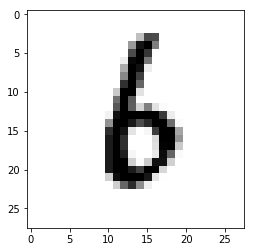

Accuracy 0.8863
Label:  [5]
Prediction:  [5]


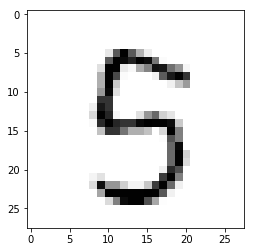

Accuracy 0.901
Label:  [7]
Prediction:  [7]


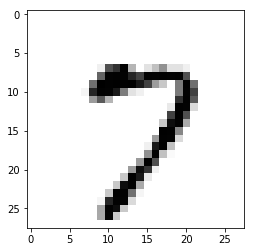

Accuracy 0.9085
Label:  [7]
Prediction:  [9]


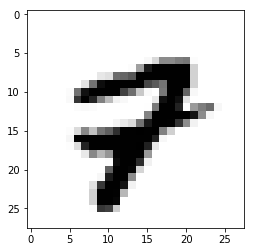

Accuracy 0.9149
Label:  [8]
Prediction:  [8]


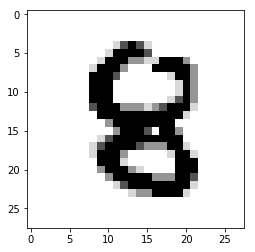

Accuracy 0.9185
Label:  [5]
Prediction:  [5]


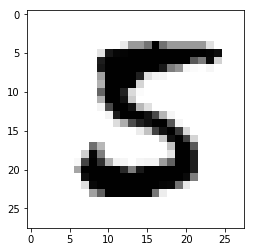

Accuracy 0.922
Label:  [5]
Prediction:  [5]


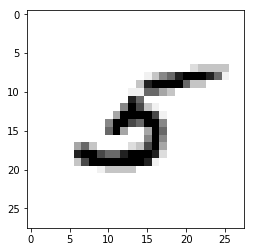

Accuracy 0.9252
Label:  [1]
Prediction:  [1]


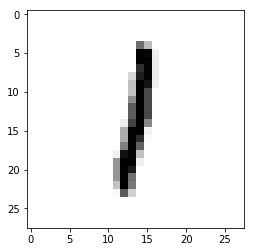

Accuracy 0.9274
Label:  [7]
Prediction:  [7]


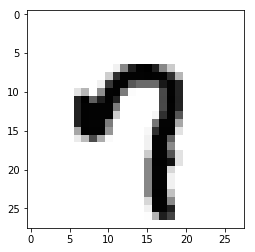

Accuracy 0.9294
Label:  [5]
Prediction:  [5]


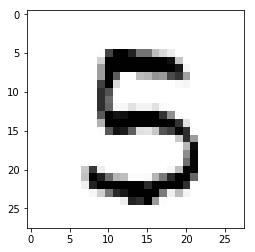

Accuracy 0.9318
Label:  [2]
Prediction:  [2]


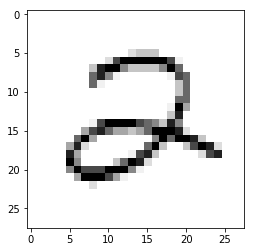

Accuracy 0.9327
Label:  [9]
Prediction:  [9]


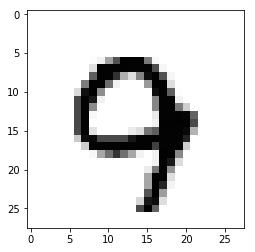

Accuracy 0.9304
Label:  [9]
Prediction:  [9]


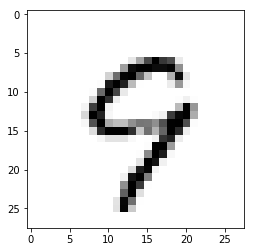

Accuracy 0.9341
Label:  [3]
Prediction:  [3]


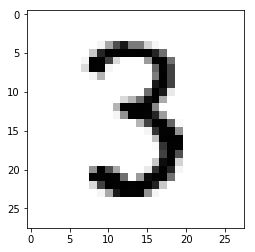

Accuracy 0.9323
Label:  [4]
Prediction:  [4]


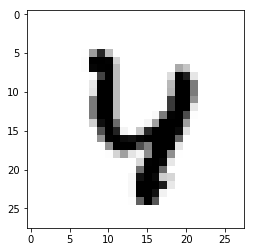

In [14]:
 
with tf.Session() as sess:
    #이는 sess=tf.Session()과 같은 의미로 계산 과정을 시작하자는 시동을 거는 것입니다. 
    
    #parameters로 iter_epoch는 전체 학습 반복 횟수, batch_size는 한번에 읽어드려서 학습시키는 양을 의미합니다. 
    #batch_size는 왜 필요할까요? 한번에 모든 데이터를 넣어버리면 용량이 과부하가 걸릴 수 있으므로! 조금씩 떼오는 느낌쓰
    iter_epoch=15
    # 데이터를(주로 train data)를 다섯번 정도 돌려보면서 학습을 하겠다 
    batch_size=100
    # 전체 데이터 중에서 100개씩 가져와서 훈련시키겠다
    #만약 dataset이 1000개이고 epoch =5, batch size =100이면 100개씩 10번돌린 걸 총 5번 반복하는 것
    
    #global_step=0
    #merged=tf.summary.merge([accuracy_sum,cost_sum])
    #writer=tf.summary.FileWriter('c:\\GH\\tensor')
    #writer.add_graph(sess.graph)
    #valid_x=mnist.validation.images
    #valid_y=mnist.validation.labels
    
    
    #전역 변수 initializer을 사용하여 우리가 만든 W등의 초기화를 미리 지정한 방식(이 경우 random_normal)으로 초기화해줍니다. 
    sess.run(tf.global_variables_initializer())
    #epoch -> total_batch(train set 갯수/batch 사이즈)로 줄여나감 : 각 epoch마다 total_batch적용
    for epoch in range(iter_epoch):
        avg_cost=0
        total_batch=int(mnist.train.num_examples/batch_size)
        #total_batch는 전체 train 데이터 개수(train.num_examples)를 미리 설정한 batch_size(이 경우 100)으로 나눈 값으로 
        #전체 train을 1번 완료 하려면 batch를 100개씩 넣는 작업을 몇번 반복해야하는 것인지를 뜻합니다 
        
        for i in range(total_batch):
            
            batch_x,batch_y=mnist.train.next_batch(batch_size)
            #train.next_batch는 다음 batch만큼의 데이터를 가져와서 batch_x,batch_y에 넣습니다.
            #이때 물론 batch_y는 각각의 사진의 실제 답,label입니다. 
            
            
            c,s,_=sess.run([cost,accuracy,optimizer],feed_dict={x:batch_x,y:batch_y})
            #cost, accuracy_sum에 batch만큼의 데이터를 집어넣어 줍니다. 이때 동시에 optimzer에도 넣어 cost를 줄여주는 학습을 진행합니다.
            #optimzer가 나타내는 값 자체는 중요하지 않기 때문에 _ 변수에 저장해주고 이런 _변수는 보통 활용하지 않을 변수에 사용합니다. 
            #train set 중에 x_batch,y_batch를 활용해여 fitting -> cost,accuracy을 각각 c,s로 지정
            
            avg_cost+=c/total_batch
            #평균 비용은 각 cost를 반복횟수인 train_batch로 나누어서 구합니다.
            #그렇다면 avg_cost는 batch당 cost! 
            
            #s=sess.run(merged,feed_dict={x:valid_x,y:valid_y})  
            #writer.add_summary(s,global_step)  
            #global_step+=1
      
       # print('Epoch:','%d' %(epoch+1), 'cost=','{0}'.format(avg_cost))
        print("Accuracy",accuracy.eval(session=sess,feed_dict={x:mnist.test.images,y:mnist.test.labels}))
        #test set을 sess(앞에서 fitting완료한 모델)에다가 넣어서 accuracy를 측정
        r = random.randint(0, mnist.test.num_examples - 1)
        #numpy.random.randint(low, high=None, size=None)
        #만약 high를 입력하지 않으면 0과 low사이의 숫자를, high를 입력하면 low와 high는 사이의 정수를 출력한다. size는 난수의 숫자이다.
        #0과 test set전체 갯수보다 하나 작은 수 사이의 정수 
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
        #데이터 하나에 대한 label
        print("Prediction: ", sess.run(
            tf.argmax(logits, 1), feed_dict={x: mnist.test.images[r:r + 1]}))
        #softmax를 거치지 않은 logit을 그대로 argmax에 넣어서 prediction했다는 점이 독특
        plt.imshow(mnist.test.images[r:r + 1].
                   reshape(28, 28), cmap='Greys', interpolation='nearest')
        plt.show()

# CNN

In [15]:
tf.set_random_seed(777)  # reproducibility를 위해 지정해둡니다. 

#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100


In [16]:
# dropout (keep_prob) rate  0.7~0.5 가 train시 권장되고 test 시에는 1을 사용해야합니다. 이 부분은 뒤에서 ppt와 함께 다시 설명해드리겠습니다. 
# 축구선수 플레이어를 모두 훈련시키는게 아니라 일부만 훈련시켰다가 실제 시합 때(test) 모두 나가는 것에 비유
keep_prob = tf.placeholder(tf.float32)

### CNN 기본 노드들을 만들어봅시다

In [17]:
#softmax 코드 부분과 다른점이 뭘까요..!?
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (흑백 사진이기에, 컬러였으면 RGB로 28*28*3 이었을 것입니다)
#사진 형태로 28*28로 받음, -1은 나머지 알아서 조정해달라는 것을 의미
Y = tf.placeholder(tf.float32, [None, 10])

### cnn 필터들과 다층 layer를 만들어봅시다

In [18]:
# L1 ImgIn shape=(?, 28, 28, 1)
#필터의 개별 크기는 [3,3,1(이는 흑백이어서,컬러면 3)]인 것이고 필터의 총 개수가 32개인것입니다.
#[가로 , 세로 , 컬러 , 필터갯수]
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
#stride에따라 필터가 모든방향으로 한칸씩 이동하면서 결과값 생성
#padding=same하면 output 이랑 input size랑 동일해짐 > 28X28X32(필터갯수)로 나옴!
L1 = tf.nn.relu(L1)
#이렇게 나온 결과값을 input으로 하여 relu 통과 
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
#28X28에서 2 X 2 의 마다 최대값만 산출하는데 stride도 2X2로 이동하므로 14x14로 절반씩 줄어듦
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
#dropout을 통해서 일부 노드만 선발
#신기하게 하나의 convolution layer를 만들기 위해서 계속 덮어 쓰는 형태임 con2d->relu->maxpool->dropout
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
'''

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
'''

# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
#엇 왜 애써 사진 모양처럼 했던 것을 다시 flat하게 펼까요? 마지막에 다시 10개로 만들어야 하기 때문! 

'''
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
'''

'\nTensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("Reshape_1:0", shape=(?, 2048), dtype=float32)\n'

### cnn 끝 부분에서 위에서 배웠던 softmax을 연결하여 학습시킵니다

In [19]:
# L4 FC 4x4x128 inputs -> 625 outputs
#random_normal을 쓰다가 Xavier_initializer을 쓰는 이유는 뭘까요?  
#적절한 초기값 제공
#초기값을 잘 설정할 수록 예측 성능이 좋아지기 때문(적절한 초기값 설정의 중요성)

W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
'''
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
'''
# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5
'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
'''
#여기서 중요한 것.! 결국 최종적으로 마지막 logits은 10개의 라벨(0~9까지의 수)
#각각으로 예상할 확률로 만들어졌다는 것. ex: N(데이터 개수) * [1 2 3 2 5 1 0 1 2 3]

'\nTensor("add_1:0", shape=(?, 10), dtype=float32)\n'

In [20]:
#역시 카테코리가 다양한 경우 cost함수는 softmax_cross_entropy_with_logit
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
#AdamOptimizer는 왜 사용할까요 ?
#관성을 이용해서 빠르게 local minimun에 도달!
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost) - DNN일땐 이거썼었음

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



### 본격적인 학습을 시작합니다

In [1]:
# 이 부분은 학습하는데 시간이 오래 걸립니다. 

sess = tf.Session()
#sess = tf.Session()와  위에서 쓴 with tf.Session() as sess는 동일한 의미입니다. 단, with - as : 방법은 
#들여쓰기를 한 부분까지만 Session이 유지되고 그 후에는 Session이 닫힙니다. 
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

NameError: name 'tf' is not defined

In [ ]:

# 내 모델의 정확도를 측정해보고 그림을 그려서 확인해봅시다. 



correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))


r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

아쉽게도 커널이 죽어서 학습까지는 실패..